# Book Recommendation EDA

In [3]:
import pandas as pd
import requests
import csv
import numpy as np
import re
from urllib.request import Request, urlopen
import ast
#plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean, median, mode
import unicodedata
import pyLDAvis.gensim
from spacy import displacy
import scattertext as st
import inflect
import scattertext as st
from pprint import pprint
import explacy

In [4]:
movie_df = pd.read_csv('formatted_movies.csv')
tv_df = pd.read_csv('formatted_tv.csv')
books_df = pd.read_csv('books.csv')

model_df = pd.read_csv('tokenized_model.csv')
model_df = model_df.where((pd.notnull(model_df)), None)
model_df.set_index('title',inplace=True)

In [5]:
#create a listing of all the genres for tv, movies, and books
#TV
full_tv_genres = list(tv_df['genres'])
all_tv_genres = []
complete_tv_genres = []
action_tf = []

for entry in full_tv_genres:
    all_tv_genres.append(entry)
    
tv_range = list(range(0,1723))
all_clean_tv_genres = []
for entry in all_tv_genres:
    entry = ast.literal_eval(entry)
    complete_tv_genres.append(entry)
    
entire_tv_list = []
for tv_group in complete_tv_genres:
    for show in tv_group:
        entire_tv_list.append(show)

tv_set = set(entire_tv_list)


#Movies
full_movie_genres = list(movie_df['genres'])
all_movie_genres = []
complete_movie_genres = []

for entry in full_movie_genres:
    all_movie_genres.append(entry)
    
movie_range = list(range(0,1912))
all_clean_movie_genres = []
for entry in all_movie_genres:
    entry = ast.literal_eval(entry)
    complete_movie_genres.append(entry)
        
entire_movie_list = []
for movie_group in complete_movie_genres:
    for movie in movie_group:
        entire_movie_list.append(movie)
        
movie_set = set(entire_movie_list)

#Books
full_book_genres = list(books_df['genres'])
all_book_genres = []
complete_book_genres = []

for entry in full_book_genres:
    all_book_genres.append(entry)
    
book_range = list(range(len(books_df)))
all_clean_book_genres = []
for entry in all_book_genres:
    entry = ast.literal_eval(entry)
    complete_book_genres.append(entry)
        
entire_book_list = []
for book_group in complete_book_genres:
    for book in book_group:
        entire_book_list.append(book)
        
book_set = set(entire_book_list)

#group the genre listings together

reality = ['17th Century','18th Century','19th Century',
           '20th Century','21st Century','Abuse','Academia','Academic',
           'Activism','Adoption','Adult','Aeroplanes','African American',
           'African Literature','Albanian Literature','Alcohol','Algeria',
           'Amazon',' American Civil War','American Fiction',
           'American History','American Revolution',
           'American Revolutionary War','Americana','Amish',
           'Ancient','Ancient History','Angels','Angola','Anthologies',
           'Anthropology','Antisemitism','Apple','Archaeology',
           'Architecture','Art','Art Design','Art History',
           'Art and Photography','Arthurian','Artificial Intelligence',
           'Asia','Asian Literature','Astronomy','Atheism','Australia',
           'Autobiography','Aviation','Bande Dessinée','Bangladesh',
           'Banned Books', 'Baseball','Basketball','Biblical Fiction',
           'Biography','Biography Memoir','Biology','Birds','Books About Books',
           'Botswana','Brain','Brazil','British Literature','Buddhism',
           'Buisness','Bulgaria','Business','Canada','Canadian Literature',
           'Cartography','Catholic','Cats','Central Africa','Chapter Books',
           'China','Chinese Literature','Christian','Christian Fantasy',
           'Christian Living','Christian Non Fiction','Christianity','Church',
           ' Church History',' Cities',' Civil War',' Classical Studies',' Classics',
           ' Clean Romance ',' Climate Change',' Climbing',' Coding',' Collections',
           'Communication',' Computer Science',' Computers',' Conservation',' Conspiracy Theories',
           ' Cookbooks',' Cooking',' Counselling','Crafts',' Crime',' Criticism',' Culinary',
           ' Cults',' Cultural',' Cultural Studies',' Culture',' Currency','Cycling',' Czech Literature',
           ' Danish','Death',' Denmark',' Design','Diary',' Dinosaurs',' Disability',' Disability Studies',
           ' Discipleship',' Doctors','Drawing',' Dutch Literature',' Dystopia',' Earth Sciences',
           ' Eastern Africa',' Ecology',' Economics',' Education',' Edwardian',' Egypt',
           ' Emergency Services',' Emotion',' Engineering',' English History',' Entrepreneurship',
           ' Environment','Essays',' Ethiopia',' European History',' European Literature',
           ' Evangelism',' Evolution','Faith',' Family',' Family Law',' Feminism',' Feminist Theory','Film',
           ' Finance',' Finnish Literature',' Fitness',' Folk Tales',' Folklore','Food History',
           ' Food Writing',' Food and Drink',' Food and Wine','French Literature',' French Revolution','Game Design',
           ' Games',' Gaming',' Gardening',' Gay',' Geek',' Gender',' Gender Studies',' Gender and Sexuality',
           ' Genetics',' Geography',' Geology',' German Literature',' Germany',' Ghana','God',' Gods',' Google',
           'Government','Greece',' Greek Mythology',' Green',' Health',' Health Care',' Historical',
           'History Of Science',' Holocaust',' Horse Racing','Humanities',' Hungarian Literature',
           ' Hungary',' India',' Indian Literature',' Inspirational',' International Development ',
           ' International Literature',' International Relations',' Internet',' Interracial Romance',' Iran',
           ' Ireland',' Irish Literature',' Islam',' Israel',' Italian Literature',' Italy',' Japan',
           ' Japanese History',' Japanese Literature',' Jazz','Jewish',' Journal',' Journalism',' Judaica',
           ' Judaism',' Juvenile',' Kenya','Labor',' Language',' Latin American',' Law',' Lds',
           ' Lds Fiction',' Leadership',' Lebanon','Lesbian',' Linguistics',' Literary Criticism',
           ' Literary Fiction',' Literature','Madagascar','Magical Realism',' Management',' Managers',' Maps',' Marathi',
           ' Marriage',' Martial Arts','Mathematics',' Media Tie In','Medicine',' Medieval',' Medieval History',
           'Memoir',' Mental Health',' Mental Illness',' Metaphysics',' Microhistory','Military',' Modern',
           ' Money','Mormonism',' Morocco',' Moscow',' Mountaineering',' Movies',' Murder Mystery',' Music',
           ' Music Biography',' Musicals',' Muslimah',' Muslims',' Native Americans',' Natural History',
           ' Nature',' Naval History',' Neuroscience',' New Adult',' New Age',' New Testament',' New Weird',
           ' New York',' Nigeria',' Nobel Prize',' Nonfiction','North American History',' Northern Africa',
           ' Nursing',' Nutrition',' Old Testament',' Omegaverse',' Ornithology',' Own',' Paganism',' Pakistan',
           ' Palaeontology','Personal Development',' Personal Finance',' Philosophy',' Photography',' Physics',' Picture Books',
           ' Plays',' Poetry',' Poland',' Polish Literature',' Political Science',' Politics',' Polyamorous',
           ' Polyamory',' Polygamy',' Pop Culture',' Popular Science',' Portugal',' Portuguese Literature',
           ' Prehistory',' Presidents','Programming',' Religion',' Research','Roman','Romania','Russia',
           ' Russian History',' Russian Literature',' Russian Revolution',' Rwanda',' Scandinavian Literature'
           ,' Scandinavian Literature',' Scotland',' Self Help',' Senegal','Sierra Leone',' Social Issues',
           ' Social Justice',' Social Media',' Social Movements',' Social Science',' Social Work',
           ' Society',' Sociology',' South Africa',' Southern',' Southern Africa',' Southern Gothic',
           ' Soviet Union',' Space',' Spain',' Spanish Literature','Spirituality','Sudan',' Sustainability',' Sweden',
           ' Swedish Literature',' Tasmania',' Teaching',' Taoism',' Textbooks',' The United States Of America',
           ' Theatre',' Theology',' Theory','Transport',' Travel',' Travelogue',' Tudor Period',
           ' Turkish',' Turkish Literature','Uganda',' Ukraine',' United States','Vegan',' Vegetarian',' War',
           ' Warfare','Western Africa',' Wilderness',' Wildlife','Womens Studies',' World History',
           ' World War I',' World War II',' Writing',' Yaoi',' Zimbabwe']
clean_reality = [x.strip() for x in reality]

anime = ['Comic Book',' Comic Fantasy',' Comic Strips',' Comics',
         ' Comics Manga',' Drawing',' Manga']
clean_anime = [x.strip() for x in anime]

classics = ['Classics']

comedy = ['Cartoon','Comedy','Humor']

action = ['Action','Adventure','Aliens',' Apocalyptic',' Batman','Combat',
          ' Dc Comics',' Doctor Who',' Dungeons and Dragons',' Epic',
          ' Epic Fantasy',' Ghost Stories',' Ghosts','Magic',' Martial Arts',
          ' Marvel','Monsters','Racing',' Robots',' Star Trek',' Star Wars',
          'Superheroes',' Superman',' Supernatural',' Survival',' Sword and Sorcery',
          ' Vampires','Witches',' Wolves',' Zombies']
clean_action = [x.strip() for x in action]

adventure = ['      Adventure',' Animal Fiction ' ,'Apocalyptic    ',' Bizarro Fiction'  ,
             'College  ',' Coming Of Age  ',' Cyberpunk  ',' Doctor Who  '  ,
             ' Dragons  ',' Dungeons and Dragons    ',' Dystopia    ',' Fables  ',
             ' Fairies  ','Fantasy   ',' Heroic Fantasy  ',' Marvel    ',
             'Military Fiction  ',' Monsters    ',' Pirates  ',' Star Trek ',
             ' Superheroes    ',' Superman    ',' Time Travel  ',
             ' Time Travel Romance  ',' Wildlife    ']
clean_adventure = [x.strip() for x in adventure]

children = ['Beauty and The Beast ','Childrens','Cinderella ',
            'Comic Book',' Comic Fantasy',' Comic Strips',' Comics',
            ' Comics Manga',' Coming Of Age','Dc Comics',' Doctor Who',
            'Dungeons and Dragons',' Musicals ',' Picture Books','Star Trek',
            ' Star Wars',' Teen ','Young Adult',' Young Adult Contemporary',
            ' Young Adult Fantasy ',' Young Adult Historical Fiction',
            ' Young Adult Paranormal ',' Young Adult Romance ',' Young Readers ']
clean_children = [x.strip() for x in children]

documentaries = [' Alternate History','American History ','Ancient History  ',
                 'Art History  ','Church History  ',' English History ',
                 ' European History  ',' Food History  ',' History  ',
                 ' History Of Science  ','Japanese History ','Medieval History  ',
                 'Microhistory  ','Military History',' Natural History  ',
                 'Naval History  ',' North American History  ','Prehistory  ',
                 ' Russian History  ',' World History  ']
clean_docs = [x.strip() for x in documentaries]

dramas = [' Adult Fiction ',' Apocalyptic ',' Cyberpunk',' Dc Comics    ',
          ' Dragons  ',' Dungeons and Dragons ',' High School',
          ' Monsters    ',' Murder Mystery',' Mystery',
          ' Mystery Thriller',' Police',' Shapeshifters',
          ' Space Opera','Spy Thriller',' Star Trek   ',
          ' Star Wars    ',' Superheroes ',' Supernatural  ',
          ' Survival  ',' Sword and Sorcery  ',' Thriller',
          ' Tragedy',' True Crime',' Vampires  ',' Victor Frankenstein',
          'War  ',' Warfare  ',' Werewolves',' World War I  ',
          ' World War II  ',' Young Adult Fantasy  ',
          'Young Adult Paranormal  ',' Young Adult Romance  ']
clean_dramas = [x.strip() for x in dramas]

fantasy = ['Animal Fiction   ','Batman ',' Christian Fantasy ',
           ' Cinderella',' Comic Fantasy ',' Cyberpunk ',
           ' Dark Fantasy',' Dc Comics',' Doctor Who ',' Dragons ',
           ' Dungeons and Dragons',' Epic Fantasy ',
           ' Fables - Adventure',' Fae',' Fairies ',
           ' Fairy Tale Retellings',' Fairy Tales',' Fantasy  ',
           ' Fantasy Romance','Folk Tales ',' Folklore ',' Futurism',
           ' Ghost Stories',' Greek Mythology',' Heroic Fantasy ',
           ' High Fantasy',' Historical Fantasy',' M M Fantasy',
           ' Magic ',' Manga',' Mermaids',' Monsters ',' Robots ',
           ' Science Fiction',' Science Fiction Fantasy',
           ' Shapeshifters',' Star Trek ',' Star Wars',
           ' Superheroes',' Superman ',' Supernatural',
           ' Sword and Sorcery',' Time Travel' ,
           ' Time Travel Romance',' Urban Fantasy',' Vampires ',
           ' Werewolves',' Young Adult Fantasy']
clean_fantasy = [x.strip() for x in fantasy]

horror = [' Demons ',' Dystopia','Ghost Stories',
          ' Ghosts','  Gothic',' Horror',' Monsters',
          ' True Crime',' Vampires ',' Victor Frankenstein',
          ' Werewolves',' Witches']
clean_horror = [x.strip() for x in horror]

international = ['Africa    ',' Algeria    ',' Amazon    ',
                 ' American    ',' Angola    ',' Asia    ',
                 'Australia    ',' Bangladesh    ',' Botswana    ',
                 ' Brazil    ',' Bulgaria    ',' Canada    ',
                 ' Central Africa    ',' China    ',' Danish    ',
                 ' Denmark    ',' Eastern Africa    ',' Egypt    ',
                 ' Ethiopia    ',' France    ',' Germany    ',
                 ' Ghana    ',' Greece    ','Hungary    ',' India    ',
                 ' Iran    ',' Ireland    ',' Israel    ','Italy    ',
                 ' Japan    ',' Kenya    ',' Lebanon     ',
                 ' Madagascar    ',' Morocco  '  ,' Moscow    ',
                 ' Nigeria    ',' Northern Africa    ',' Pakistan    ',
                 ' Poland    ',' Roman    ',' Romania    ',
                 ' Russia    ',' Rwanda    ',' Scotland    ',' Sierra Leone    ',
                 'South Africa    ',' Southern    ',' Southern Africa    ',
                 ' Soviet Union    ',' Spain    ',' Sudan    ',
                 ' Sweden    ',' The United States Of America    ',
                 ' Turkish    ',' Uganda    ',' Ukraine    ',
                 ' United States    ',' Western Africa    ',
                 ' Westerns  ',' Zimbabwe  ']
clean_international = [x.strip() for x in international]

romantic = ['BDSM ',' Christian Romance ' ,' Cinderella    Fantasy',
            ' Erotic Romance',' Historical Romance',
            ' Interracial Romance  ',' Lovecraftian',
            ' Medieval Romance ',' Military Romance',
            ' Paranormal Romance',' Regency Romance',
            'Romance',' Romania  ',
            ' Science Fiction Romance',' Sports Romance',
            ' Western Romance']
clean_romantic = [x.strip() for x in romantic]

scifi = [ 'Animal Fiction', 'Artificial Intelligence  ',' Cyberpunk',
         'Dark Fantasy ',' Demons',' Doctor Who ',' Dragons ',
         ' Dungeons and Dragons',' Epic Fantasy ',' Futurism',
         ' Futuristic ',' Ghost Stories ',' Ghosts ',
         ' Hard Science Fiction ',' Magic ',' Paranormal',
         ' Paranormal Mystery ',' Paranormal Romance',' Popular Science ',
         ' Science Fiction',' Science Fiction Fantasy',
         ' Science Fiction Romance',' Space Opera',' Star Trek ',
         ' Star Wars',' Superheroes',' Superman',' Supernatural',
         ' Unicorns',' Utopia',' Victor Frankenstein',
         ' Weird Fiction',' Werewolves',' Zombies']
clean_scifi = [x.strip() for x in scifi]

thriller = ['Aliens ','Cozy Mystery','Crime ',' Demons ',
            'Detective','Dinosaurs ',' Dragons ',' Legal Thriller',
            'Murder Mystery',' Mystery',' Mystery Thriller',
            'Nordic Noir','Occult','Paranormal Mystery ',
            ' Spy Thriller',' Thriller']
clean_thriller = [x.strip() for x in thriller]

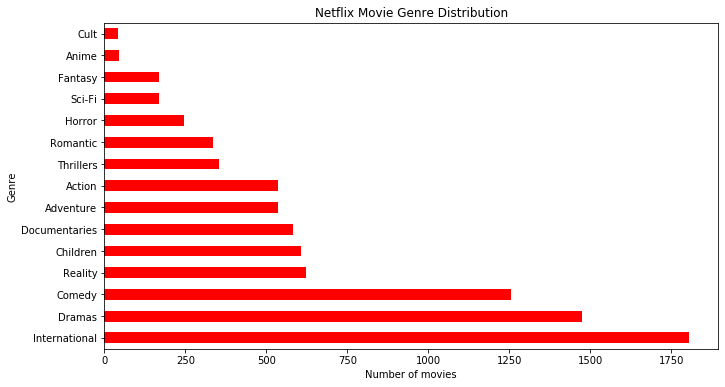

In [6]:
ax = pd.value_counts(entire_movie_list).plot.barh(title='Netflix Movie Genre Distribution', figsize=(11,6), color='red');
ax.set_xlabel('Number of movies')
ax.set_ylabel('Genre')
plt.xticks(rotation = 0)
plt.savefig('netflix_movie_genres.png');

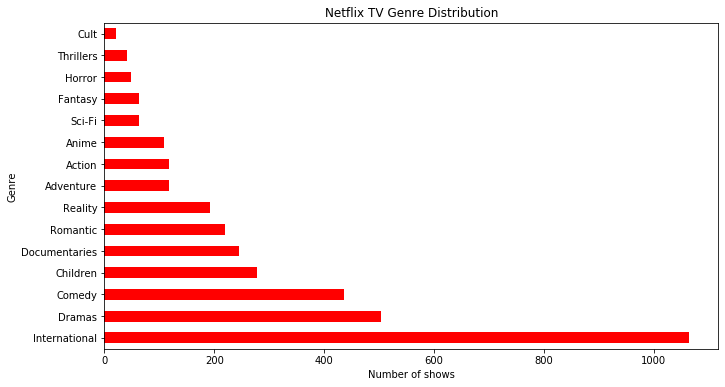

In [7]:
ax2 = pd.value_counts(entire_tv_list).plot.barh(title='Netflix TV Genre Distribution', figsize=(11,6), color='red')
ax2.set_xlabel('Number of shows')
ax2.set_ylabel('Genre')
plt.savefig('netflix_tv_genres.png');

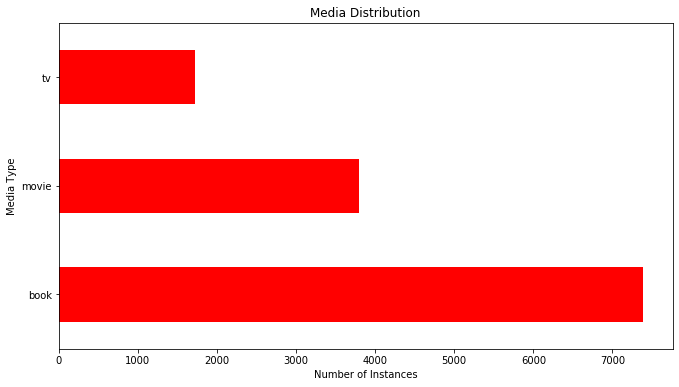

In [8]:
ax3 = (model_df['media_type'].value_counts()).plot.barh(title='Media Distribution', color='red', figsize=(11,6))
ax3.set_xlabel('Number of Instances')
ax3.set_ylabel('Media Type')
plt.savefig('media_distribution.png');

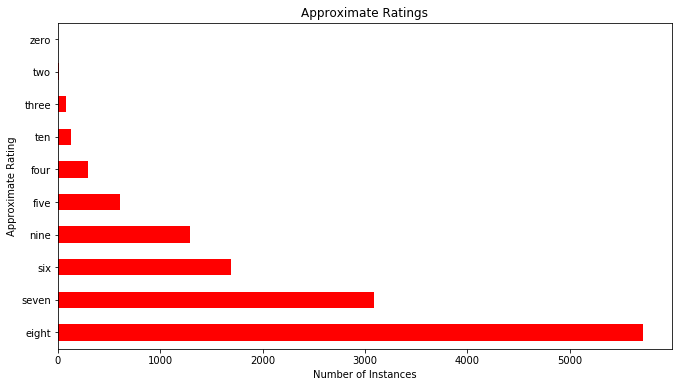

In [9]:
ax4 = (model_df['score'].value_counts()).plot.barh(title='Approximate Ratings', color='red', figsize=(11,6))
ax4.set_ylabel('Approximate Rating')
ax4.set_xlabel('Number of Instances')
plt.savefig('rounded_ratings.png');

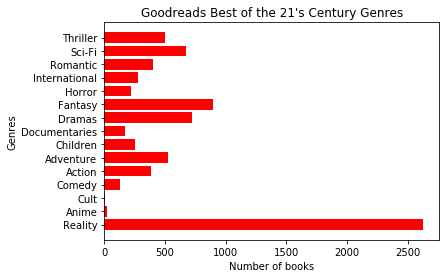

In [10]:
books_df['International'].value_counts()
books_international_count = 279
books_df['Dramas'].value_counts()
books_dramas_count = 721
books_df['Comedy'].value_counts()
books_comedy_count = 128
books_df['Children'].value_counts()
books_children_count = 252
books_df['Documentaries'].value_counts()
books_documentaries_count = 167
books_df['Romantic'].value_counts()
books_romantic_count = 399
books_df['Reality'].value_counts()
books_reality_count = 2627
books_df['Anime'].value_counts()
books_anime_count = 21
books_df['Cult'].value_counts()
books_cult_count = 9
books_df['Action'].value_counts()
books_action_count = 382
books_df['Adventure'].value_counts()
books_adventure_count = 524
books_df['Fantasy'].value_counts()
books_fantasy_count = 893
books_df['Horror'].value_counts()
books_horror_count = 219
books_df['Sci-Fi'].value_counts()
books_scifi_count = 673
books_df['Thriller'].value_counts()
books_thriller_count = 496

plt.barh(['Reality', 'Anime', 'Cult', 'Comedy', 
         'Action', 'Adventure', 'Children',
         'Documentaries', 'Dramas', 'Fantasy',
         'Horror', 'International','Romantic', 'Sci-Fi', 'Thriller'], 
        [books_reality_count,books_anime_count,books_cult_count, 
         books_comedy_count,books_action_count,books_adventure_count,
         books_children_count, books_documentaries_count,books_dramas_count,
         books_fantasy_count,books_horror_count,books_international_count,
         books_romantic_count,books_scifi_count, books_thriller_count],color='red')
plt.ylabel('Genres')
plt.xlabel('Number of books')
plt.title("Goodreads Best of the 21's Century Genres")
plt.savefig('goodreads.png');

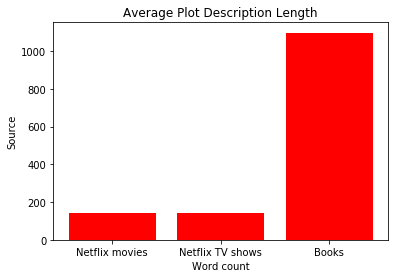

In [11]:
#EDA on plot lengths 

#TV
tv_plot_lengths = []

for plot in tv_df['plot']:
    tv_plot_lengths.append(len(plot))

average_tv_length = round(mean(tv_plot_lengths))
median_tv_length = median(tv_plot_lengths)
mode_tv_length = mode(tv_plot_lengths)

#Movies
movie_plot_lengths = []

for plot in movie_df['plot']:
    movie_plot_lengths.append(len(plot))
    
average_movie_length = round(mean(movie_plot_lengths))
median_movie_length = median(movie_plot_lengths)
mode_movie_length = mode(movie_plot_lengths)

#Books
book_plot_length = []
for plot in books_df['text']:
    book_plot_length.append(len(plot))

average_book_length = round(mean(book_plot_length))
median_book_length = round(median(book_plot_length))
mode_book_length = mode(book_plot_length)

texts = [average_movie_length, average_tv_length, average_book_length]
plt.bar(['Netflix movies', 'Netflix TV shows', 'Books'],texts,color='red')
# fig.plot.bar(media_types,texts,color='red')
plt.title('Average Plot Description Length');
plt.ylabel('Source')
plt.xlabel('Word count')
plt.savefig('plot_length.png')